<a href="https://colab.research.google.com/github/Abdul-Qadeerr/data-science/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)


In [8]:

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [9]:
# =======================
# 2. Load Dataset (with fallback)
# =======================
if not os.path.exists("data.csv"):
    data = {
        "Name": ["Abeer", "Qadeer", "Umer", "Sehrish", "Khani", "Qadeer"],
        "Age": [25, 30, 28, 26, 35, None],
        "Salary": [50000, 60000, 55000, 65000, 70000, 60000],
        "Performance": [80, 85, 75, 90, 95, 88]
    }
    df = pd.DataFrame(data)
    df.to_csv("data.csv", index=False)
    print("Sample data.csv created!")

df = pd.read_csv("data.csv")
df.head()

,Name,Age,Salary,Performance
0,Abeer,25.0,50000,80
1,Qadeer,30.0,60000,85
2,Umer,28.0,55000,75
3,Sehrish,26.0,65000,90
4,Khani,35.0,70000,95


In [10]:
# =======================
# 3. First Look at Data
# =======================
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nBasic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include="all"))

Shape of dataset: (6, 4)

Columns: ['Name', 'Age', 'Salary', 'Performance']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6 non-null      object 
 1   Age          5 non-null      float64
 2   Salary       6 non-null      int64  
 3   Performance  6 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 324.0+ bytes
None

Summary Statistics:
          Name        Age        Salary  Performance
count        6   5.000000      6.000000      6.00000
unique       5        NaN           NaN          NaN
top     Qadeer        NaN           NaN          NaN
freq         2        NaN           NaN          NaN
mean       NaN  28.800000  60000.000000     85.50000
std        NaN   3.962323   7071.067812      7.17635
min        NaN  25.000000  50000.000000     75.00000
25%        NaN  26.000000  56250.000000   

In [11]:
# =======================
# 4. Missing Values Check
# =======================
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Name           0
Age            1
Salary         0
Performance    0
dtype: int64


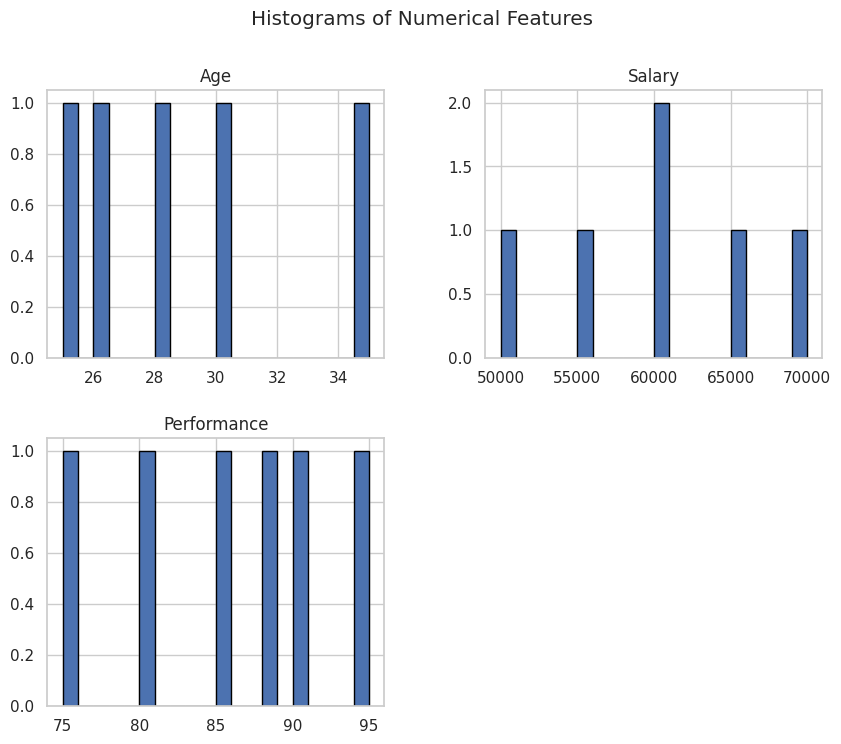

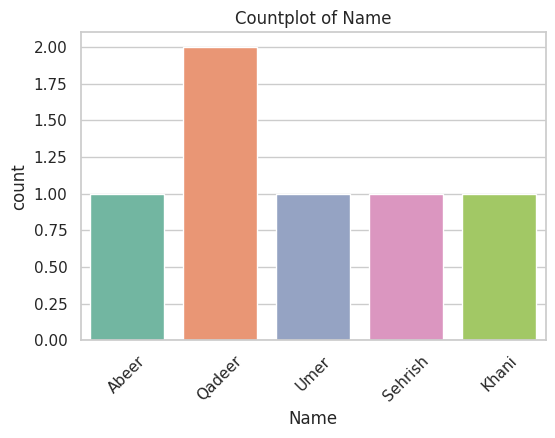

In [15]:
# 5. Univariate Analysis

# Histograms
df.hist(figsize=(10, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Countplots (fixed warning)
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)  # ✅ fixed
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


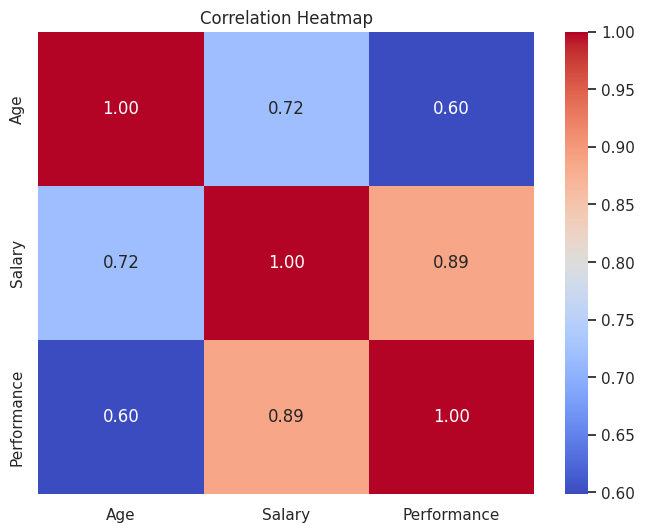

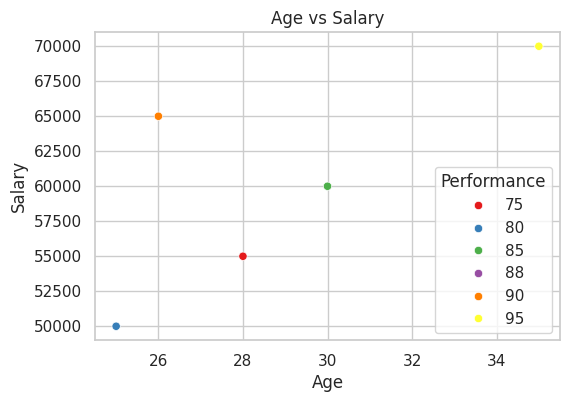

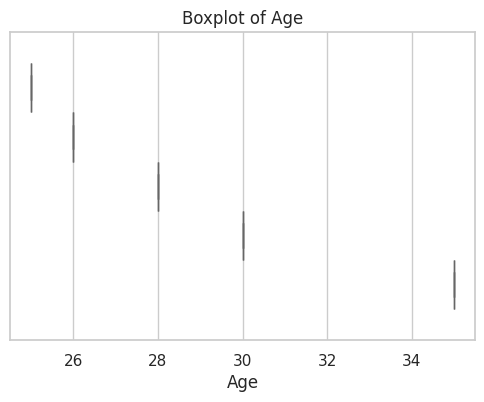

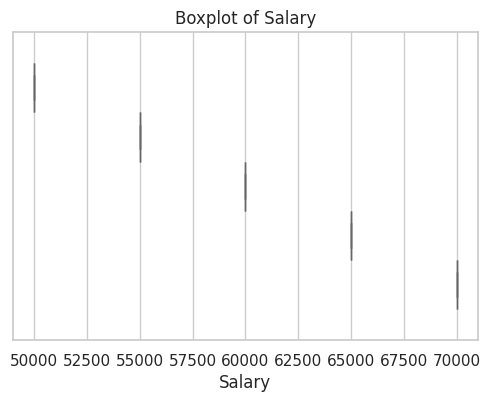

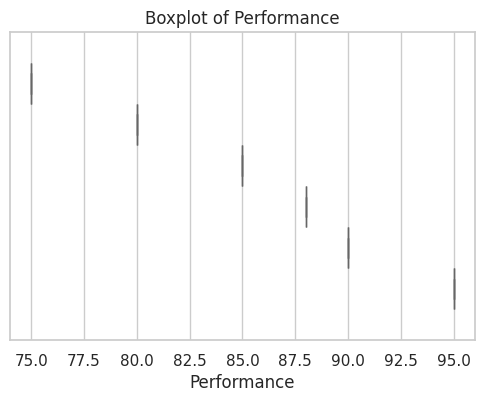

In [16]:
# 6. Bivariate Analysis

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot Age vs Salary (with Performance hue if exists)
if "Age" in df.columns and "Salary" in df.columns:
    plt.figure(figsize=(6,4))
    hue_col = "Performance" if "Performance" in df.columns else None
    sns.scatterplot(data=df, x="Age", y="Salary", hue=hue_col, palette="Set1")
    plt.title("Age vs Salary")
    plt.show()

# Boxplots for numeric columns (fixed warning)
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, hue=col, palette="Set3", legend=False)  # ✅ fixed
    plt.title(f"Boxplot of {col}")
    plt.show()


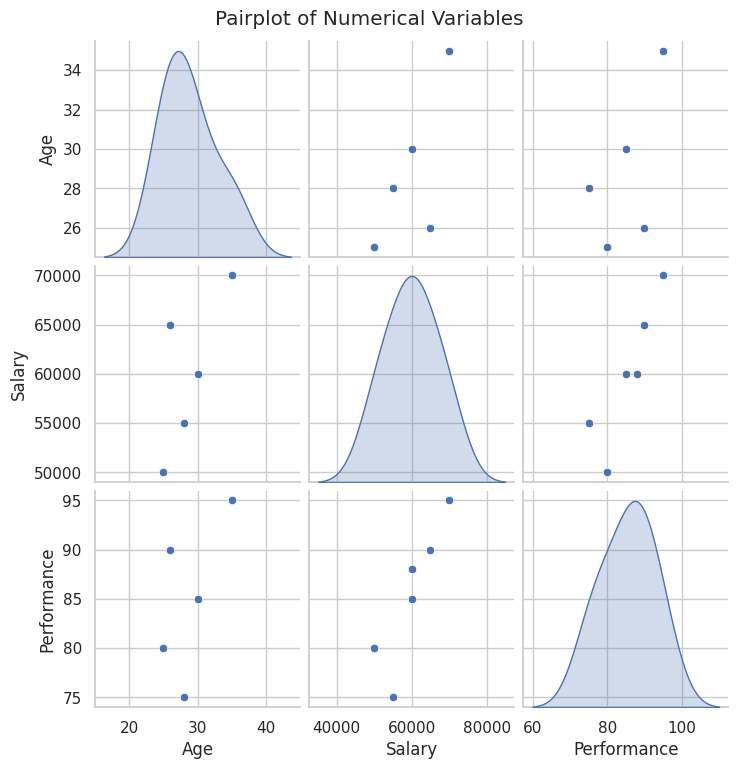

In [14]:
# =======================
# 7. Pairplot
# =======================
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) > 1:
    sns.pairplot(df[num_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Numerical Variables", y=1.02)
    plt.show()
else:
    print("Not enough numerical columns for pairplot.")